# Support Vector Machines and Deep Neural Networks for Image processing
`Computer Vision and Intelligence Group, IIT Madras`

## What are Support Vector Machines?

* Given 2 classes as shown in the image, $\ H1, H2, H3$ all represent the possible decision boundary that can be predicted be your classifier. Which decision boundary is the preferred one?
  * $H1$ is wrong as its not separating the classes properly
  * Both $H2$ and $H3$ separates the classes correctly. What's the difference between these decision boundaries?
  * The problem is even if the data is linearly separable, we arent sure that which line ($H1, H2, H3$) does the classifier ends up learning. $SVM$s were initially born out of the need to answer this question.
![svm_idea](http://www.bogotobogo.com/python/scikit-learn/images/svm/svm_diagram.png)


Answer to this question is to define an optimal separating hyperplane.

Whats Optimal Separating Hyperplane???

Its a surface such that the nearest data point to the surface is **as far away as possibe** among all such surfaces.

* Nearest data point neednt belong to just one class. 

* So in the previous image, the line $H2$ is by definition not a optimal separating hyperplane. This is because, its not satisfying the "$as\ far\ away\ as\ possible$" condition. In fact the data points are much closer to the separating hyper plane in this case. 

* On the other hand, $H3$ is optimally separating as the distance from either class data points are maximum, and any further change will result in either of the distance reducing.

  * When you are maximiaing the distance of the closest point to the separating hyperplane, that means that the closest data point from either of the class is at the same distance away from the hyper plane.
  
![svm_optimal_hyperplane](https://www.researchgate.net/profile/Fabio_Faria2/publication/236212250/figure/fig2/AS:299339575513097@1448379524785/The-SVM-classifier-builds-a-maximum-margin-decision-hyperplane-to-separate-two-classes.png)

So the aim of the classifier is to make the margin  as large as possible. Now intuitively lets see what such a line means.....

Any linear classifier (as covered in Linear Regression, Logistic Regression) we have covered so far, we have seen,

\begin{equation}
y = \beta_{0} + x_{1}\beta_{1} + x_2\beta_2 + ...... + x_n\beta_n
\end{equation}

Represents the line that acts as a decision boundary in linear classifiers. Where

$x_1, x_2, ...., x_n$ are the features (inputs) and $\beta_0, \beta_1, \beta_2, ...... \beta_n $ are the weights and biases respectively.

Now for convinience let define 2 matrices
\begin{equation}
\beta = 
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n
\end{bmatrix}_{n \times 1}
\\
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}_{n \times 1} \\
x^{T}\beta = 
\begin{bmatrix}
x_1 &
x_2 &
\dots & 
x_n
\end{bmatrix}_{1 \times n}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n
\end{bmatrix}_{n \times 1} = 
\sum_{i = 1}^{n}\beta_ix_i \\
y = \beta_0 + x^{T}\beta
\end{equation}

So all the points satisfying the condition, $y = 0$ represent the decision boundary and the solid black line in the figure. (Since the image represents 2-D, equation of the decision boundary reduces to $y = \beta_0 + \beta_1x$)

In normal linear classifier, what will we do?

If, 
\begin{equation}
\beta_0 + x^T\beta < 0 \implies Class\  -1\  (Note\ the\ Class\ encoding) \\
\beta_0 + x^T\beta > 0 \implies Class\  +1
\end{equation}

$But\ what\ do\ we\ want\ Here\ (SVM)\ ??$

**We want the point to be atleast $M\ (Margin)$ distance away from the line $\beta_0 + x^{T}\beta = 0$.**

So our optimization problem changes to,

\begin{equation}
\beta_0 + x^T\beta < M \implies y_i =  -1 \\
\beta_0 + x^T\beta > M \implies y_i =  +1
\end{equation}

Where $y_i$ is the class label.

In a single line it can be written as

\begin{equation}
y_i(\beta_0 + x^T\beta) > M
\end{equation}

This is our constraint. Whats our objective ?

Our objective is to maximize the $margin$ of the classifier. So the optimization unfolds like this,

\begin{equation}
\max_{\beta_0, \beta, ||\beta|| = 1} M \\
\\ subject\ to\ y_i(\beta_0 + x^T\beta) > M\ \forall\  i 
\end{equation}

Assuming that the data is nicely separated and a nice line can separate it.

Solving this optimization problem (which we will not go into the details) we will get $\beta_0, \beta_{n \times 1}$ which represent the optimally separating plane with maximum margin.

Note the way in which we formulated this optimization problem, we are maximizing the margin without allowing (strictly) any data points inside that margin. (No Tolerence whatsoever)

Solving this optimization problem, we can prove that

* $Only\ the\ data\ points\ on\ the\ margin\ matters\ in\ determining\ the\ values\ of\ \beta_0 and\ \beta_{n\times 1}.$

* Other points which are not on the margin (which are further away from the margin) of the classifier cannot affect the solution.

* Vectors (data points $x$) which are on the margin are called $support\ vectors$. They essentially support the margin of the classifier.

![support_vectors](http://www.saedsayad.com/images/SVM_2.png)

In [0]:
!pip install keras
import numpy as np
import scipy
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
from random import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
from sklearn import datasets
import seaborn
from sklearn.datasets import make_classification, make_blobs, make_gaussian_quantiles
seaborn.set(style='ticks')

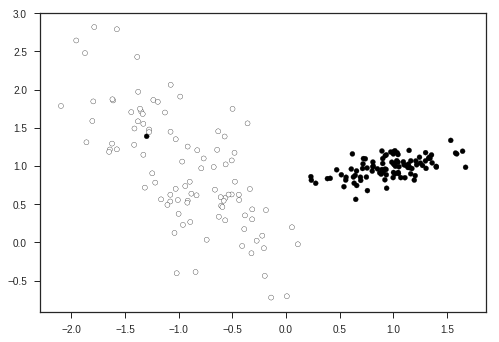

In [0]:
X1, Y1 = make_classification(n_samples = 200, n_features = 2, n_redundant=0, n_informative =2,
                            n_clusters_per_class = 1, class_sep = 1)
plt.scatter(X1[:,0], X1[:,1], marker = 'o', c= (Y1), s = 25, edgecolor = 'k')
plt.show()

Let's view the decision boundaries predicted by various kernals, here:
* RBF
* Linear
* Polynomial

Kernel: linear's Report
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      0.95      0.97        20

avg / total       0.98      0.97      0.97        40

Test Score: 	0.975


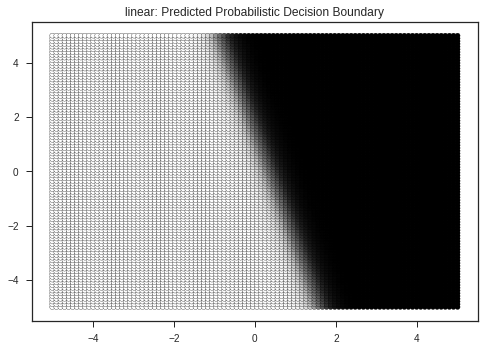

Kernel: poly's Report
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      0.95      0.97        20

avg / total       0.98      0.97      0.97        40

Test Score: 	0.975


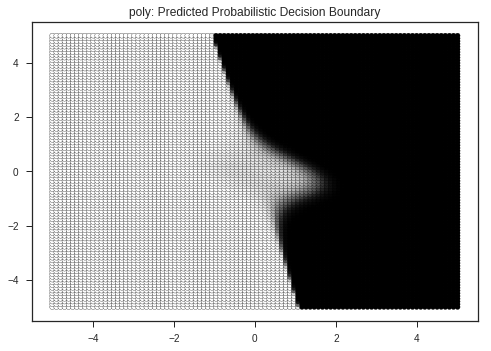

Kernel: rbf's Report
             precision    recall  f1-score   support

          0       0.95      1.00      0.98        20
          1       1.00      0.95      0.97        20

avg / total       0.98      0.97      0.97        40

Test Score: 	0.975


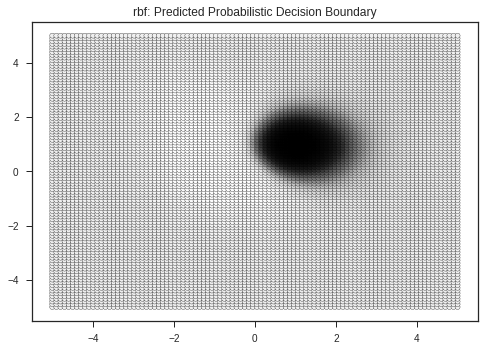

In [0]:
dataset = list(zip(X1, Y1))
shuffle(dataset)
X1, Y1 = list(zip(*dataset))

x_train = X1[:int(0.8*len(X1))]
x_test = X1[int(-0.2*len(X1)):]
y_train = Y1[:int(0.8*len(X1))]
y_test = Y1[int(-0.2*len(X1)):]

kernel_list = ['linear', 'poly', 'rbf']

for idx,kernel in enumerate(kernel_list):
  clf = SVC(gamma = 0.5, kernel = kernel, probability = True)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print ("Kernel: " + kernel + "'s Report")
  print (classification_report(y_test, y_pred))
  print ("Test Score: \t" + str(np.mean((y_pred == y_test).astype('int'))))
  x = np.linspace(-5, 5, 100)
  xx,yy = np.meshgrid(x,x)
  x_feature = np.vstack((xx.flatten(), yy.flatten())).T
  # print (x_feature.shape)
  y_mesh = clf.predict(x_feature)
  prob_mesh = clf.predict_proba(x_feature)
  prob_mesh_1 =  (prob_mesh.T[1])   # Probability of class 1 (0 means WHITE, 1 means black) 
  plt.scatter(xx.flatten(), yy.flatten(), marker = 'o',c = prob_mesh.T[1].flatten(), s = 25, edgecolor = 'k')
  plt.title(kernel + ": Predicted Probabilistic Decision Boundary")
  plt.show()
  #   ax.title(kernel + " : Predicted probabilistic decision boundary")
  


Margin of the Classifier: 0.4291569167774637


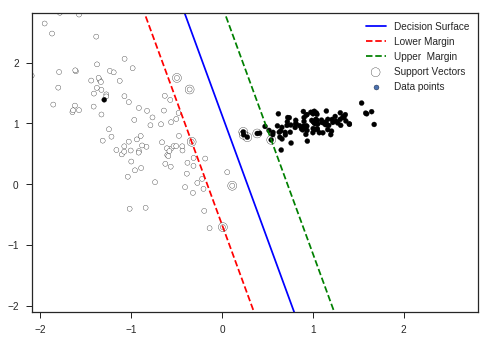

In [0]:
clf = SVC(kernel = 'linear')
clf.fit(x_train, y_train)
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print ("Margin of the Classifier: " + str(margin))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.clf()
plt.plot(xx, yy, 'k-',color = 'b', label = 'Decision Surface')
plt.plot(xx, yy_down, 'k--',color = 'r', label = 'Lower Margin')
plt.plot(xx, yy_up, 'k--',color = 'g', label = 'Upper  Margin')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k', label = 'Support Vectors')
X1 = np.array(X1)
min_ = np.amin(X1)
max_ = np.amax(X1)
plt.scatter(X1[:, 0], X1[:, 1] , c=Y1, s=25,edgecolors='k', label = 'Data points')
plt.xlim(min_, max_)
plt.ylim(min_,  max_)
plt.legend(loc = 'best')
plt.show()

You may see in the plot that some data points enter the $forbidden$ area according to our explanation, but complex optimization and using many constraints enable this flexibility to $SVM$s. Now they will be more robust to near margin noise.

Other notes on $SVM$ ?

* None training data should fall within the margin of the classifier.
* If linear assumption (as of now) is true and the previous point is also valid, then this is a **very very robust ** classifier. This is because the solution ($\beta's$) depend only on the support vectors not on other points. So its immune to noise.
* On the other hand if a stochastic process is generating data points and if the points fall well within the margin of the classifier. It can affect the classifier very well since we gave no allowance to any datapoints in any class to be present within the margin. 
  * To accomodate the noise data point (possibly) it will shrink the margin and therby losing its robust nature.
  * Classifiers that not only take support vectors, but that take the entire dataset to find the distribution will be more accurate in this case.

# Kernel Transformations

### What if the data is not linearly separable ?

** Transform the data so that it becomes linearly separable !!!!** 

What do you mean be a transform ??

In [0]:
r1 = 3

r2 = 8
std = 0.25

t = np.linspace(0, 2*np.pi, 500)

x_1 = r1*np.cos(t) + std*np.random.randn(len(t))
y_1 = r1*np.sin(t) + std*np.random.randn(len(t))

x_2 = r2*np.cos(t) + std*np.random.randn(len(t))
y_2 = r2*np.sin(t) + std*np.random.randn(len(t))

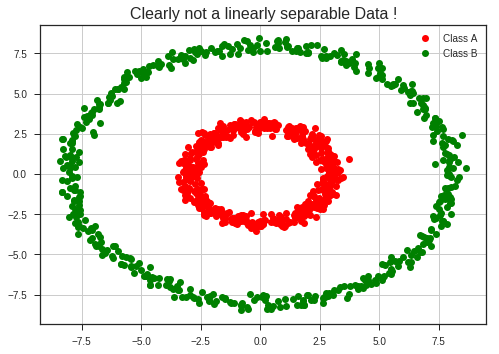

In [0]:
plt.plot(x_1, y_1, 'ro', label = 'Class A')
plt.plot(x_2, y_2, 'go', label = 'Class B')
plt.legend(loc = 'best')
plt.grid(True)
plt.title("Clearly not a linearly separable Data !", fontsize = 16)
plt.show()

Creating using this transformation,

\begin{equation}
z = x^2 + y^2 = f(x,y)
\end{equation}

Plotting that we see one amazing thing !

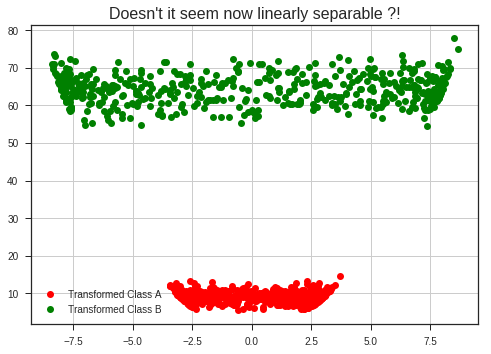

ValueError: ignored

In [0]:
plt.plot(x_1, x_1**2 + y_1**2, 'ro', label = 'Transformed Class A')
plt.plot(x_2, x_2**2 + y_2**2, 'go', label = 'Transformed Class B')
plt.legend(loc = 'best')
plt.grid(True)
plt.title("Doesn't it seem now linearly separable ?!", fontsize = 16)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_1, y_1, x_1**2 + y_1**2, 'ro')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x_2, y_2, x_2**2 + y_2**2, 'go')
# ax.scatter(x_2, y_2, np.zeros_like(x_2))
plt.title("2D non-linearly Sepa.able Data - can be linearly Separable in 3-D !")
plt.show()

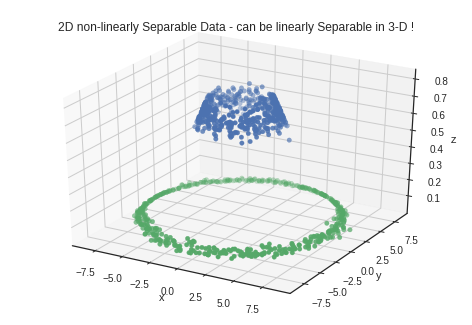

In [0]:
from mpl_toolkits.mplot3d import Axes3D
def gaussian(x,y, mu_x = 0,mu_y = 0, sigma_x = 5, sigma_y = 5, A = 1):
  return (A*(np.exp(-((x-mu_x)**2/(sigma_x**2)) + -((y-mu_y)**2/(sigma_y**2)))))
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_1, y_1, gaussian(x_1, y_1), 'ro')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(x_2, y_2, gaussian(x_2, y_2), 'go')
# ax.scatter(x_1, y_1, np.zeros_like(x_1))
plt.title("2D non-linearly Separable Data - can be linearly Separable in 3-D !")
plt.show()

These kind of transformations can be done on the data to make it linearly separable. Such transformations are called **Kernel Transformations**. Some popular examples are,

* Polynomial Kernel $\implies (1 + <x, x^{'}>)^d $
* Radial Basis Function $\implies e^{-\gamma||x - x^{'}||^2}$
* Artificial Neural Network $\implies tanh(k_1<x, x^{'}> + k_2) $

To understand how Kernel Transformations work, we will look into a simple example of Polynomial kernel.

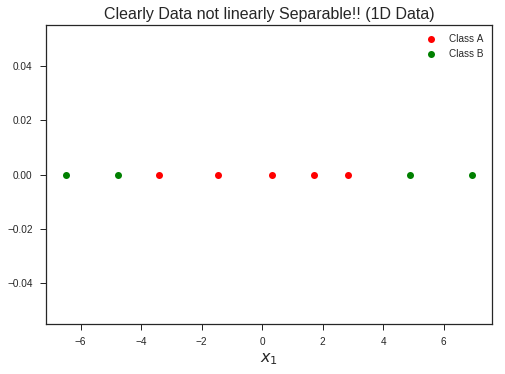

In [0]:
x1 = np.linspace(-3, 3, 5) + 0.25*np.random.randn(len(np.linspace(-3, 3, 5)))
x2 = np.linspace(5, 7, 2)  + 0.25*np.random.randn(len(np.linspace(5, 7, 2)))
x3 = np.linspace(-5, -7, 2)  + 0.25*np.random.randn(len(np.linspace(-5, -7, 2)))
x2 = np.c_[x2, x3].flatten()
plt.plot(x1, np.zeros_like(x1), 'ro', label = 'Class A')
plt.plot(x2, np.zeros_like(x2), 'go', label = 'Class B')
plt.title("Clearly Data not linearly Separable!! (1D Data)", fontsize = 16)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.legend(loc = 'best')
plt.show()

### Increasing the dimentionality of the problem, now lifting this 1-D dataset to 2-D problem by introducing a new feature...

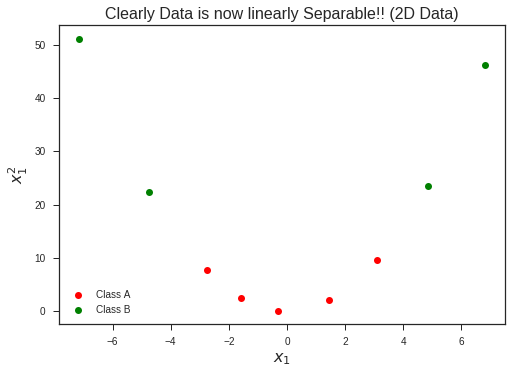

In [0]:
plt.plot(x1,x1**2, 'ro', label = 'Class A')
plt.plot(x2, x2**2, 'go', label = 'Class B')
plt.title("Clearly Data is now linearly Separable!! (2D Data)", fontsize = 16)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_1^2$', fontsize = 16)
plt.legend(loc = 'best')
plt.show()

# Neural Networks

## What are they?
Neural networks are models which behave as universal function approximators. This means that they can be used to model basically any function out there. Here we will look at an example of using them for a simple 2 class classification problem. 

The neural network model is composed of basic units called layers. Each layer recieves a vector as input and produces a vector output. Let the input of a layer be $x$, and its output $y$. The simplest kind of layer is a **Dense** layer. It just implements an affine transformation.

\begin{equation}
y = W x + b
\end{equation}

Note that the above equation is a matrix equation, and $W$ is called the weight matrix. The constant vector $b$ added is called the bias vecctor. Note that the weights and biases of each layer are the parameters of the model. The goal is to choose these parameters such that the total model best fits the data we have observed.

The simplest model is composed of 1 layer. The input and output to the model are $x$ and $y$ in the above equation. If $x$ has a size of $N$, and $y$ has a size of $N$, then $W$ would be a $M \times N$ matrix.

To make models with more parameters, we can cascade Dense layers one after another. A model with two layers would look something like

\begin{equation}
y = W_2 (W_1 x + b_1) + b_2
\end{equation}

Note that the number of rows of $W_1$ and $b_1$ can be chosen by us arbitrarily, because the only constraints are on the rows of $W_2$ and columns of $W_1$, corresponding to $M$ and $N$. We can add as many layers as we want which are as large or small as we want.

Can you notice something off in the above discussion?

No matter how many Dense layers you cascade, we can always simplify the model into one dense layer. So in essence, we aren't adding any new capability to the model, as its output will always be linear with the input. To fix this issue, we have introduce some form of non-linearity in the model. This is done by applying a non-linear function to the outputs of each of the layers. Let us call this function $\sigma (z)$. This function is called an activation function. Some commonly used activation functions are:

* The sigmoid activation: $\sigma (z) = \frac{1}{1+e^{-z}}$
* The hyperbolic tangent: $\sigma (z) = \tanh (z)$
* The rectified linear activation (ReLU): $\sigma (z) = max(0,z)$

Our new 2-layer model will now look like this:


\begin{equation}
y = \sigma(W_2 \sigma(W_1 x + b_1) + b_2)
\end{equation}


Now, we have the ability to tweak the numerous parameters in the weight matrices and bias vectors to make the function from $x$ to $y$ look like almost anything we want. The more number of parameters we have to tweak, in general, will give us more control over how the total function looks. But too many parameters will not only make it slower to compute with, but can also cause overfitting, a problem which we will deal with later. The factors of the neural network like the number of layers, how large the output of each individual layer is, and which activation function to use for each layer are called **hyperparameters**.

But why are these types of models called neural networks anyway? Well, we can interpret the model with a finer resolution. The values of vectors can be thought of as the outputs of small computational units called neurons. The neurons in the output of a dense layer can be thought of as units which multiply each of the incoming inputs by a corresponding weight and then adding them all up along with a bias. Then, an activation is applied to this sum. The neuron then sends this value as its output. We can then represent our 2 layer model with the figure below:

![nn](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png)

You can think of the two sets of arrows as the two weight matrices $W_1$ and $W_2$. This interpretation of the model draws analogies with how the brain works. The brain is supposedly an interconnected network of neurons whose electrical activations depend on the excitations given to them through the connections with other neurons. However, that's as far as this analogy gets.

## 'Training' a neural network

Ok, so now that we have a model which can more or less approximate any function we want, how do we set the weights of our model to fit the function which we want (this job is called training the model)? First, we need a measure of how good of a fit a particular set of weights will result in. We can evaluate this measure by comparing the outputs of the model to some inputs with the actual outputs we want. The set of inputs and outputs which we already have is called the **dataset**. So, the dataset can be represented as $(x_i,y_i)$. Suppose our model gives the output $y'_i$ when given an input $x_i$. Ideally, $y'_i = y_i$ for all $i$. But this will never be the case. So we have to look at how $y_i$ and $y'_i$ differ. We can define a **loss** function on $y_i$ and $y'_i$ which outputs one number representing how far away the two vectors are from each other. Our goal would then be to minimize the sum of this loss function **over all the points in our dataset** by varying the weights and biases of the network. Our job of training the network is now reduced to an optimization problem.  We solve this problem using the following approach. We find the output of the network to all the inputs from the dataset and evaluate the total loss using the outputs. We then find the **gradient** of the loss function with respect to ALL the parameters in the network. Then, we tweak the parameters to move in the opposite direction of the gradient so as to reduce the loss. We then repeat this process many times over all our samples until we reach a minimum in the loss. 

There are a whole host of tasks in the above paragraph. They are as follows:
* What loss function to use?
* How to find the gradient of the loss with respect to so many parameters?
* Suppose we could do the above, how much along the gradient should we move, and how are we sure that we will reach a global minimum?
* Finding the outputs and gradients each time for ALL the data points would be extremely slow, is there anything better we can do?

Here are some short answers without detail, as these problems are not trivial.
* This depends on what type of function you are trying to approximate.
* This is done using an inegnious algorithm called **backpropagation**. It is basically a repeated application of the chain rule.
* In short, we aren't sure that it will reach a global minimum. But it turns out in practice that a local minimum is pretty good too. How much to move along the gradient is basically another hyperparameter.
* We can solve this by just going through a small part of the data before each parameter update. This is called batching the data.

We won't go over the details of backprop in this session, as it takes a while to digest, but we will instead implement a neural network and train it.

Our input is going to be a vector of size 2. The task is to classify this input into two classes. The two classes are given by two probability distributions  over the 2D plane as shown below. They are radial gaussians with different means. The dataset which we use for training will be sampled from these distributions.

In [0]:
def probab(x,y,R = 2,sigma=0.5):
  """2D Radial gaussian distribution."""
  r = np.sqrt(x**2 + y**2)
  p = np.exp(-(r-R)**2/sigma**2)
  return p

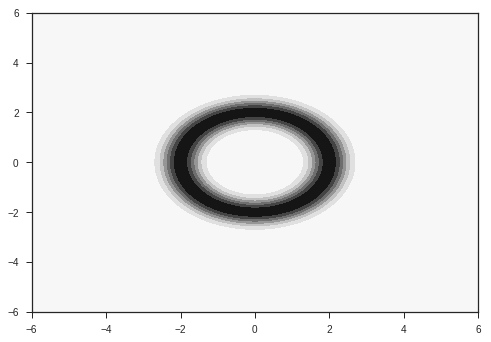

In [0]:
# contour plot of distribution
R1=2
R2=5
xr = np.linspace(-6,6,1000)
x,y = np.meshgrid(xr,xr)
p1 = probab(x,y, R = R1)
p2 = probab(x,y,R = R2)
plt.contourf(x,y,p1)
plt.show()

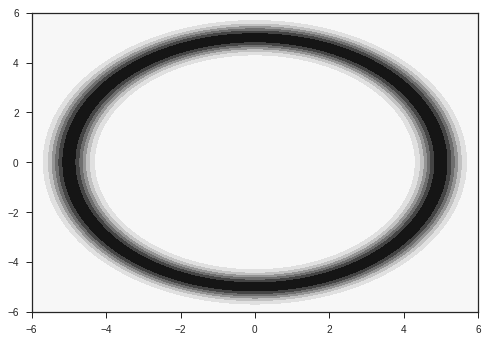

In [0]:
plt.contourf(x,y,p2)
plt.show()

These distributions are the ones from which we will sample our data. In reality, we will have access only to the sampled data, and won't have knowledge of these distributions. Also, most of the data in the real world won't be simply 2 dimensional. Images for example are data points in very high dimensional space, with around 1000 independent dimensions. Keep these two points in mind while following this example.

In [0]:
def sample2d(x,y,p,samples=100):
  """Sample a 2D distribution given by p. The range of values of the two 
  variables are given in x and y."""
  
  # first sample along x
  px = np.sum(p,axis=1) # distribution in x
  px = px/np.sum(px) # normalize
  
  # get x sample indices
  x_samples_ind = np.random.choice(np.arange(x.shape[0]),samples,p=px)
  
  # sample along y conditioned on x samples
  y_samples_ind = [np.random.choice(np.arange(y.shape[0]),
                                    p=p[x_ind]/np.sum(p[x_ind])) 
                   for x_ind in x_samples_ind]
  
  # get values
  x_s = [x[i] for i in x_samples_ind]
  y_s = [y[i] for i in y_samples_ind]
  
  # scatter plot samples
  plt.scatter(x_s, y_s)
  plt.xlim([min(x),max(x)])
  plt.ylim([min(y),max(y)])
  plt.xlabel("$X$")
  plt.ylabel("$Y$")
  plt.title("Samples from distribution")
  
  s = np.stack((np.array(x_s),np.array(y_s)))
  
  return s.T.reshape((-1,2))

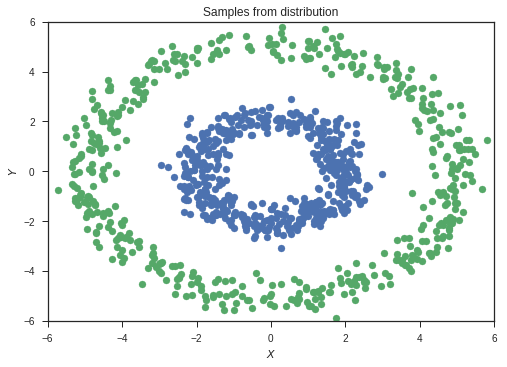

In [0]:
samples1 = sample2d(xr,xr,p1,500)
samples2 = sample2d(xr,xr,p2,500)

This is our set of sampled data. The colours represent the classes of the two sets of data.

In [0]:
#print(samples1)
#print(samples2)

In [0]:
from keras.layers import *
from keras.models import *

In [0]:
!pip3 install livelossplot

In [0]:
from livelossplot import PlotLossesKeras

# The model
The neural network which we are building is a very small one. It has 3 hidden layers, with $tanh$ activations and an output layer with a softmax activation. The softmax activation is defined as follows:


\begin{equation}
y_i = \frac{e^{z_i}}{\sum_{j=0}^N e^{z_j}}
\end{equation}

Where $y_i$ represents the $i^{th}$ element of the output vector. This is the output activation we use for classification tasks, as the values of the output can be interpreted as class probabilities. The loss function to use for classification tasks is called the _cross entropy_ loss. The loss for binary classification is as follows:

\begin{equation}
−(ylog(p)+(1−y)log(1−p))
\end{equation}

Where $y$ is the binary label of the datapoint, and $p$ is the probability for the input being in that class predicted by our model. The derivations of these activations and losses require probability and information theory concepts, which we won't get into here.

The first layer has an output of size 4, while the other two have an output of size 2.

In [0]:
inp = Input((2,))

t = Dense(4,activation='tanh')(inp)
layer1 = Dense(2 ,activation='tanh')(t)
layer2 = Dense(2 ,activation='tanh')(layer1)
presoftmax = Dense(2)(layer2)
out = Activation('softmax')(presoftmax)

model = Model(inputs=inp,outputs=out)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
train_data = np.concatenate((samples1,samples2))
l1 = np.array([1,0])
l2 = np.array([0,1])
labels = np.concatenate((np.tile(l1,(samples1.shape[0],1)),np.tile(l2,(samples2.shape[0],1))))

Let's go ahead and train the model, and look at how the loss and accuracy change with time.

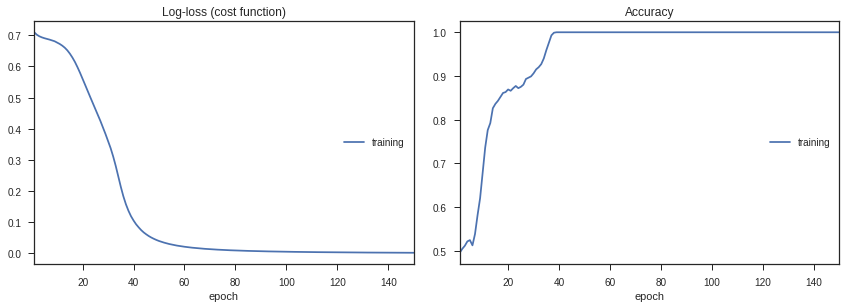

In [0]:
history = model.fit(train_data,labels,epochs=150,callbacks=[PlotLossesKeras(dynamic_x_axis=False)])

In [0]:
def plotModelOut(x,y,model):
  grid = np.stack((x,y))
  grid = grid.T.reshape(-1,2)
  outs = model.predict(grid)
  y1 = outs.T[0].reshape(x.shape[0],x.shape[0])
  plt.contourf(x,y,y1)
  plt.show()

In [0]:
def plotModelGrid(x,y,model=None):
  grid = np.stack((x,y))
  grid = grid.T.reshape(-1,2)
  
  x_coords = grid.T[0]
  y_coords = grid.T[1]
  class1 = grid[np.where(x_coords**2+y_coords**2>((R1+R2)/2)**2)]
  class2 = grid[np.where(x_coords**2+y_coords**2<=((R1+R2)/2)**2)]
  
  if model != None:
    outs1 = model.predict(class1)
    outs2 = model.predict(class2)
  else:
    outs1 = class1
    outs2 = class2
    
  
  c1 = class1.shape[0]
  x1 = outs1.T[0]
  y1 = outs1.T[1]
  
  c2 = class2.shape[0]
  x2 = outs2.T[0]
  y2 = outs2.T[1]
  
  plt.scatter(x2,y2,s=0.05)
  plt.scatter(x1,y1,s=0.05)
  plt.show()

In [0]:
lay1 = Model(inputs=inp,outputs=layer1)
lay2 = Model(inputs=inp,outputs=layer2)
presoft = Model(inputs=inp,outputs=presoftmax)

Let's plot the first component of the output for each point on the x-y plane. This is basically the model's prediction of the probability of the point belonging to the first class(the gaussian with smaller radius).

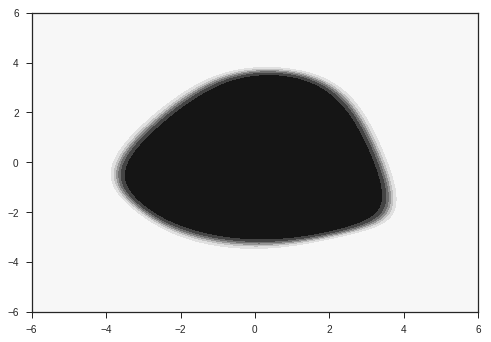

In [0]:
plotModelOut(x,y,model)

Let's look at the maps of the hidden layers. The following is the input we give to the model:

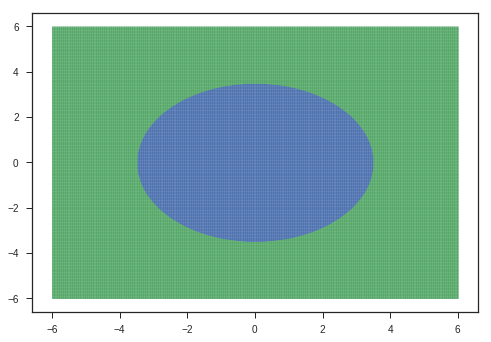

In [0]:
plotModelGrid(x,y)

The second layer maps the points with the corresponding colour to the following points:

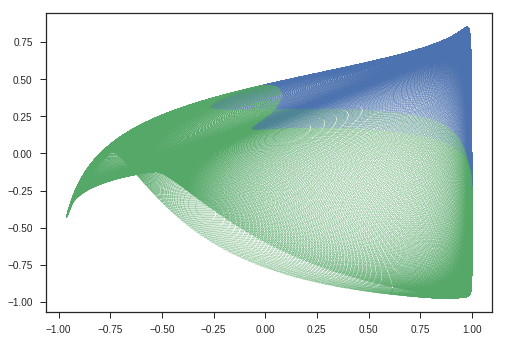

In [0]:
plotModelGrid(x,y,lay1)

The third layer as follows:

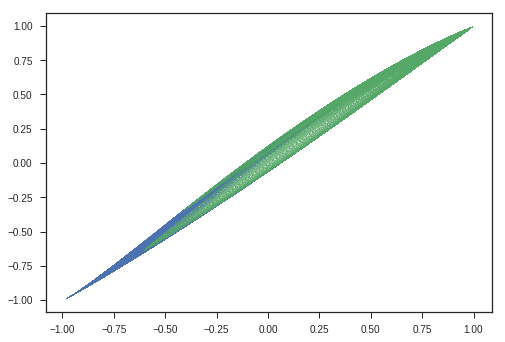

In [0]:
plotModelGrid(x,y,lay2)

And the output just before applying a softmax looks like this:

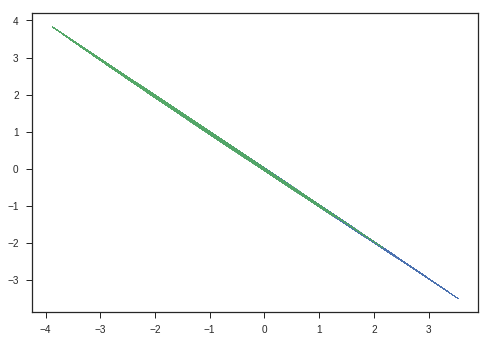

In [0]:
plotModelGrid(x,y,presoft)

# Outliers and overfitting

If we have too few samples, and a too big network, the model is extremely sensitive to outliers. This means that the model will try its best to accomodate all the datapoints, which are few in number, and will overfit to these points. This is possible because the large number of parameters in the network give it a lot of capacity.

In [0]:
inp2 = Input((2,))

te = Dense(1000,activation='tanh')(inp2)
te = Dense(1000,activation='tanh')(te)
te = Dense(1000,activation='tanh')(te)
out2 = Dense(2,activation='softmax')(te)

model2 = Model(inputs=inp2,outputs=out2)
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 2002      
Total params: 2,007,002
Trainable params: 2,007,002
Non-trainable params: 0
_________________________________________________________________
None


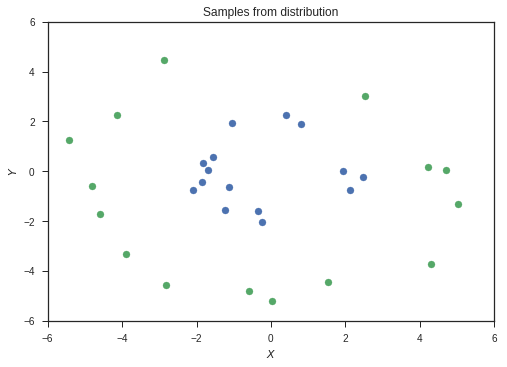

In [0]:
samples1_2 = sample2d(xr,xr,p1,15)
samples2_2 = sample2d(xr,xr,p2,15)
train_data2 = np.concatenate((samples1_2,samples2_2,[[-5,5],[5,-5]]))
labels2 = np.concatenate((np.tile(l1,(samples1_2.shape[0],1)),np.tile(l2,(samples2_2.shape[0],1)),np.array([[1,0],[1,0]])))
#plt.scatter([-6],[6],color='blue')

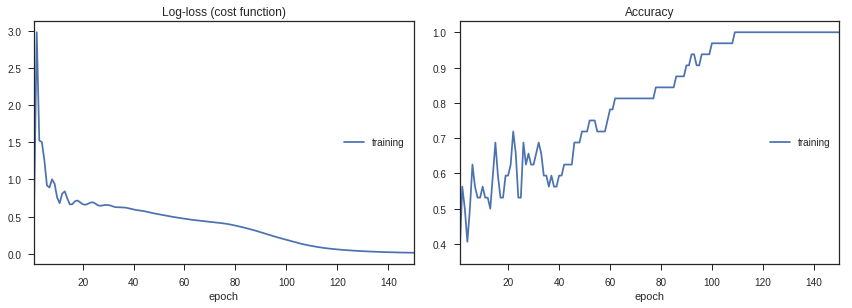

In [0]:
history = model2.fit(train_data2,labels2,epochs=150,callbacks=[PlotLossesKeras(dynamic_x_axis=False)])

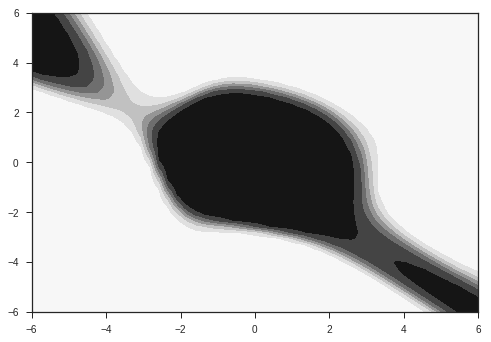

In [0]:
h=np.linspace(-6,6,50)
x_, y_ = np.meshgrid(h,h)
plotModelOut(x_,y_,model2)

## Linear Algebra Intuition 

## What does Multiplying a Matrix with a Column Vector do?

Lets assume a matrix $\boldsymbol{A}$ of size $N*N$, a column vector $\boldsymbol{x}$ of size $N*1$.


\begin{equation}
y = Ax
\end{equation}


Let's assume $A$ is a $3*3$ Matrix with its entries as follows,

\begin{equation}
A = 
\begin{bmatrix} 
a_1 & a_2 & a_3 \\ 
b_1 & b_2 & b_3 \\ 
c_1 & c_2 & c_3  
\end{bmatrix}
\end{equation}

and $x$ to be a column vector ($3*1$)
\begin{equation}
x = 
\begin{bmatrix} 
x_1  \\ 
x_2  \\ 
x_3   
\end{bmatrix}
\end{equation}


Now lets multiply them ans see the resulting output vector,

\begin{equation}
y = Ax = 
\begin{bmatrix} 
a_1 & a_2 & a_3 \\ 
b_1 & b_2 & b_3 \\ 
c_1 & c_2 & c_3  
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix} =
\begin{bmatrix}
a_1x_1 + a_2x_2 + a_3x_3 \\
b_1x_1 + b_2x_2 + b_3x_3 \\
c_1x_1 + c_2x_2 + c_3x_3
\end{bmatrix} = 
\begin{bmatrix}
  x_1
  \begin{pmatrix}
  a_1 \\
  b_1 \\
  c_1
  \end{pmatrix} +
  x_2
  \begin{pmatrix}
  a_2 \\
  b_2 \\
  c_2
  \end{pmatrix} + 
  x_3
  \begin{pmatrix}
  a_3 \\
  b_3 \\
  c_3
  \end{pmatrix}
\end{bmatrix}
\end{equation}

So multiplying a matrix with a column vector returns a vector which is a linear combination of its column vectors (as shown above).

* $C(A) = $ It denotes the column space of the matrix $A$. Column space is the span of all the column vectors of Matrix $A$.  


\\
$Intuitively,\ what\ does\ it\ do?$

In [0]:
def transform(A, x, y, bias = ([0,0])):
  '''
  Parameters
  ----------
  A : Matrix that transforms the space
  x: x_coordinates
  y: y_coordinates
  bias: Bias vector to be added
  
  Returns
  -------
  y_transformed: The transformed space, ([x_trans, y_trans])
  max_value: The maximum value of the distorted + input space
  '''
  x_matrix = np.vstack((x, y))
  y_transformed = (A.dot(x_matrix).T + bias).T
  max_value = np.hstack((x_matrix, y_transformed)).max()
  return y_transformed, max_value

We will show the transformations that matrix multiplication does using an ellipse or a circle. Remember the parametric coordinates of an ellipse or circle?

**Parametric Equations of an Ellipse**

\begin{equation}
x = acos(\theta)\\
y = bsin(\theta)\\
\theta\  \epsilon\ [0,2\pi]
\end{equation}

\\

We will use this to plot an ellipse and apply transformations to these coordinates and see the transforms and try to gain intuitions.

In [0]:
t = np.linspace(0, 2*np.pi, 100)

x_c = 2*np.cos(t)
y_c = np.sin(t)
x_matrix = np.vstack((x_c, y_c))
max_value = x_matrix.max()

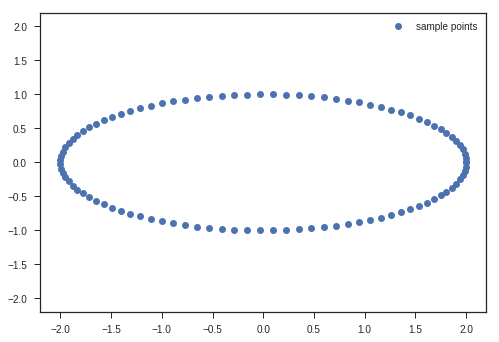

In [0]:
plt.plot(x_c, y_c, 'o', label = 'sample points')
plt.legend(loc = 'best')
plt.xlim(-1.1*max_value, 1.1*max_value)
plt.ylim(-1.1*max_value, 1.1*max_value)
plt.show()

Lets define a $2-D\ Matrix\ A$ 

\begin{equation}
A = 
\begin{bmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{bmatrix}
\end{equation}

Remember distantly what this matrix does?

Its a Rotating Matrix, which rotates the space without scaling the space. We will see the meanings of these terms shortly. 

\begin{equation}
Ax = 
\begin{bmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix} = 
\begin{bmatrix}
xcos\theta - ysin\theta \\
xsin\theta + ycos\theta
\end{bmatrix} = 
\begin{bmatrix}
x^{'} \\
y^{'}
\end{bmatrix}
\end{equation}

Whats the **determinant** of this Rotation Matrix??
\begin{equation}
|A| = 
\begin{vmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{vmatrix} =
cos^{2}\theta + sin^{2}\theta = 1 
\end{equation}

*Determinants* are related to the volume change during matrix transformation.
  * $|A| = 1$ => Volume of any closed surface in the space is conserved. The distortion caused by matrix in the space is preserving volume. No closed surface expands or contracts in this transform. 

  * $|A| > 1$ => Volume of any closed surface in space increases. 
  
  * $|A| = 0$ => Closed surface volume reduces to 0.
![rotaion_description](http://jcsites.juniata.edu/faculty/rhodes/graphics/images/rotate1.gif)

This image describes the why this matrix is called **Rotation matrix** in 2D.

If the input column vector $x$ is taken to represent coordinates of a point in 2D space, then after 
doing the transformation ((i.e) multiplying with matrix $A$),

We get the rotated point represented as $[x^{'}, y^{'}]$ in this image. 

Now we have analysed this matrix transformation for one point. What will happen to a set of points in 2-D space?


In [0]:
theta = np.pi/4
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])


In [0]:
y_matrix, max_value = transform(A, x_c, y_c)

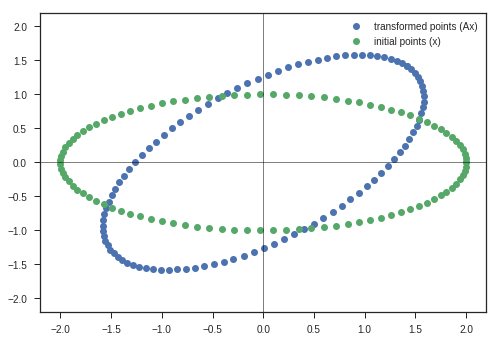

In [0]:
plt.plot(y_matrix[0], y_matrix[1], 'o', label = 'transformed points (Ax)')
plt.plot(x_c, y_c,'o', label = 'initial points (x)')
plt.legend(loc = 'best')
plt.xlim(-1.1*max_value, 1.1*max_value)
plt.ylim(-1.1*max_value, 1.1*max_value)
plt.axvline(linewidth=0.5, color = 'k')
plt.axhline(linewidth=0.5, color = 'k')
plt.show()

Observations:

* Entire Ellipse (Represented in blue) is rotated with respect to the initial ellipse (green one) by the angle $\theta$ we specified the program.

Inferences:

* Matrix rotate the space. (If Rotation is only desired, keep the determinant 1)

In [0]:
t = np.linspace(0, 2*np.pi, 100)

x_c = np.cos(t)
y_c = np.sin(t)
x_matrix = np.vstack((x_c, y_c))
max_value = x_matrix.max()

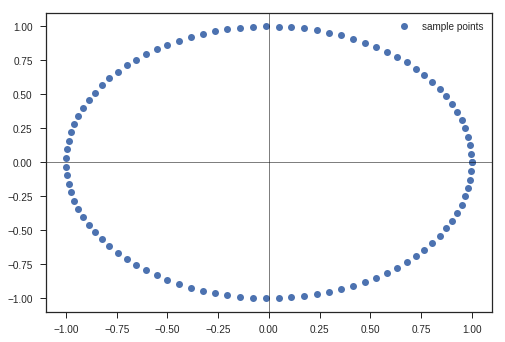

In [0]:
plt.plot(x_c, y_c, 'o', label = 'sample points')
plt.legend(loc = 'best')
plt.xlim(-1.1*max_value, 1.1*max_value)
plt.ylim(-1.1*max_value, 1.1*max_value)
plt.axvline(linewidth=0.5, color = 'k')
plt.axhline(linewidth=0.5, color = 'k')
plt.show()

Now, lets take this matrix and study its transform abilities.

\begin{equation}
A = 
\begin{bmatrix}
2 & 0 \\
0 & 1
\end{bmatrix}
\end{equation}

Whats the determinant of this matrix?

\\

\begin{equation}
|A| = 
\begin{vmatrix}
2 & 0 \\
0 & 1
\end{vmatrix} = 
2
\end{equation}

\\
\begin{equation}
Ax = 
\begin{bmatrix}
2 & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix} = 
\begin{bmatrix}
2x \\
y
\end{bmatrix}
\end{equation}


What does this mean?

\begin{equation}
\begin{bmatrix}
x \\
y
\end{bmatrix} \longrightarrow
\begin{bmatrix}
2x \\
y
\end{bmatrix}
\end{equation}

This streches the space along x direction, preserving y direction.

## Eigen Decomposition

An ** *Eigenvector* ** of a square matrix $\boldsymbol{A}$ is  a non-zero vector $\boldsymbol{v}$ such that transformation by $\boldsymbol{A}$ (multiplication by $\boldsymbol{A}$) only scales the vector $\boldsymbol{v}$ by a factor $\boldsymbol{\lambda}$ which is its ** *EigenValue* **.

\begin{equation}
\boldsymbol{A}v = \lambda v
\end{equation}

So, if we find **eigenvectors** of matrix $A$, we can say that those directions are the directions that will be only **scaled** by the transformation by this matrix (Scaled by its eigenvalue). All the other directions other than eigenvector directions, will be **both** scaled and rotated, to maintain **continuity of the transformation**.

If $\boldsymbol{v}$ is an eigenvector of $\boldsymbol{A}$, and has an eigenvalue $\lambda$, whats the eigenvalue of $c\boldsymbol{v}$, c is a constant?

Its also $\lambda$ right? So we use unit normalized eigenvectors.

Suppose matrix $\boldsymbol{A}$ has $n$ independent eigenvectors, { $v^{(1)}, v^{(2)}, v^{(3)}, ....., v^{(n)}$ } with its corresponding eigenvalues, { $\lambda_{1}, \lambda_{2}, ......, \lambda_{n}$ }.

Then, we can concatenate all the eigenvectors into a single matrix called $\boldsymbol{V}$, which can be represented as

\begin{equation}
\boldsymbol{V} = 
\begin{bmatrix}
 \vdots & \vdots & \vdots & \vdots \\
 v^{(1)} & v^{(2)} & \cdots & v^{(n)}\\
 \vdots & \vdots & \vdots & \vdots
\end{bmatrix}_{n\times n}
\end{equation}

We can define a diagonal matrix, where each diagonal entry is $\lambda_{i}$ corresponsing to $v^{(i)}$.

\begin{equation}
diag(\lambda) = 
\begin{pmatrix}
    \lambda_{1}\\
    &\lambda_{2}\\
    && \lambda_{3}\\
    &&& \cdots\\
    &&&& \lambda_{n}
\end{pmatrix}_{n\times n}
\end{equation}


Then matrix $\boldsymbol{A}$ can be reconstructed from these matrices $\boldsymbol{V}$ and $\boldsymbol{diag(\lambda)}$ using $\boldsymbol{Eigendecomposition}$ of $\boldsymbol{A}$, which is given by,

\begin{equation}
\boldsymbol{A} = \boldsymbol{V}diag\boldsymbol{(\lambda)}\boldsymbol{V}^{-1}
\end{equation}

Whats the use of this???

* We can *construct* matrix with specific **eigenvectors** and **eigenvalues** that allows us to stretch the space in desired directions.
* We can design specific matrices that can distort the space in such a way that data becomes easily separable so that our classifier can separate the data easily. ** Now you get the point of why we did  all this !!! **

We want to create matrix that can distort the space in such a way that we want our data to get sepatated.

* ** Neural Nets distort the input data in high dimentional space using these matrix multiplications, (Apply activations in middle), until the data becomes linearly separable.**
* ** This distortions can be analysed by eigendecomposition and singular value decomposition of weight matrices of the layers of Deep neural nets.** 

In [0]:
A = np.array([[2,0],
              [0,1]])

In [0]:
y_matrix, max_value = transform(A, x_c, y_c)

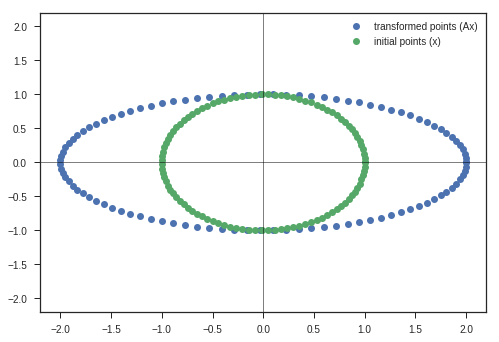

In [0]:
plt.plot(y_matrix[0], y_matrix[1], 'o', label = 'transformed points (Ax)')
plt.plot(x_c, y_c,'o', label = 'initial points (x)')
plt.legend(loc = 'best')
plt.xlim(-1.1*max_value, 1.1*max_value)
plt.ylim(-1.1*max_value, 1.1*max_value)
plt.axvline(linewidth=0.5, color = 'k')
plt.axhline(linewidth=0.5, color = 'k')
plt.show()

In [0]:
def eigen_decomposition(A, x, y, scale_by_eigen = False, bias = np.array([0,0])):
  y_matrix, max_value = transform(A, x, y, bias)
  W, V = np.linalg.eig(A)
  SCALE = 10
  # print (V.shape, W.shape)
  if scale_by_eigen:
    V[:,range(len(W))]*= W   # Multiplying the EigenVector with Eigenvalue
  no_of_points =  len(V[:,0])
  plt.quiver(np.zeros(no_of_points),np.zeros(no_of_points)  , V[0], V[1],color = ['r', 'b'], scale = SCALE, label = 'Eigen Vectors')
  plt.plot(y_matrix[0], y_matrix[1], 'o', label = 'transformed points (Ax)')
  plt.plot(x, y,'o', label = 'initialnp.array(bias) points (x)')
  plt.xlim(-1.1*max_value, 1.1*max_value)
  plt.ylim(-1.1*max_value, 1.1*max_value)
  plt.axvline(linewidth=0.5, color = 'k')
  plt.axhline(linewidth=0.5, color = 'k')
  plt.quiver([0], [0], bias[0], bias[1], scale = 21, label = 'Bias Vector')
  plt.legend(loc = 'best')
  return W, V, y_matrix

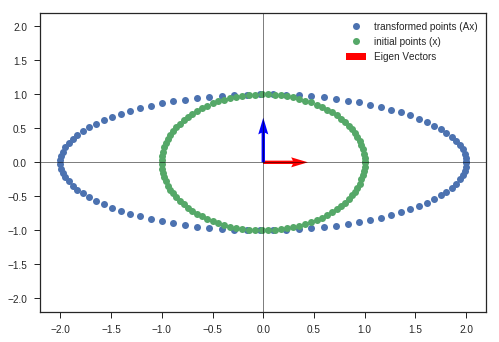

In [0]:
w_1, v_1, y_matrix_1 = eigen_decomposition(A, x_c, y_c)

In [0]:
A = np.array([[6,2],
              [3,2]])

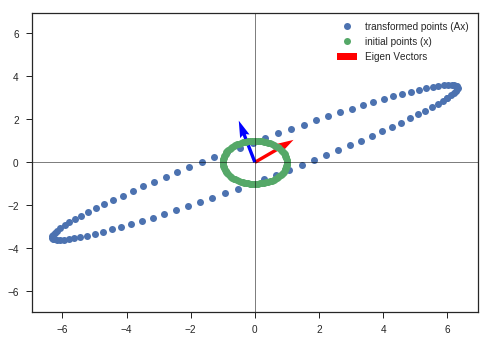

In [0]:
w_2, v_2, y_matrix_2 = eigen_decomposition(A, x_c, y_c)

Obseravtions:

* The vectors near to eigenvectors donot rotate that much. They get scaled by the eigenvalue (if its an eigenvector, else a small rotation is present).
* Vectors that are far away from either of the eigenvectors are severly rotated and scaled. (Maintain the continuity of the figure)
* Volume has increased greater than the initial circle, which indicates that the determinant of the matrix is greater than 1.

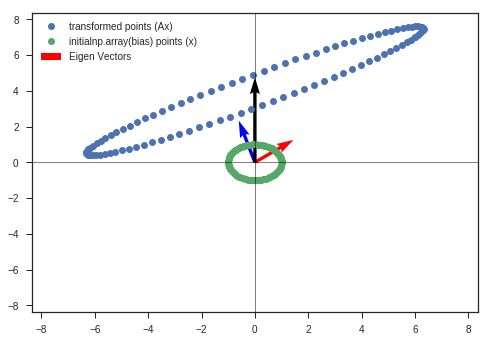

In [0]:
bias = [0,4]
w_2b, v_2b, y_matrix_2b = eigen_decomposition(A, x_c, y_c, bias = bias)

Observations:

* Other than other observations (listed in the previous plot), we can see the bias has just shifted the distorted figure along that direction (bias vector's direction).

So we get the answer of why bias is needed?

This is because, if bias is not added we are restricted with origin as center. Its similar to

\begin{equation}
y = mx + b
\end{equation}

where b acts as a bias. If $b = 0$, we will be restricted to use only lines which pass through origin. 

\begin{equation}
y = mx
\end{equation}

So addition of bias gives **extra freedom** to move anywhere in the space ($translation$), multiplying with the weight matrix enables the model to $distort$, $scale$, $rotate$ the space (with center at $origin$) the space.

So Neural Net basicaly $moves$ (bias), $distorts$ data points by $scaling$ and $rotating$ them (weights) in hyperdimentional space, **with an aim to find a transformation to make the data linearly separable at the end**. 

In [0]:
# What if determinant is 0?
A = np.array([[3,2],
              [3,2]])

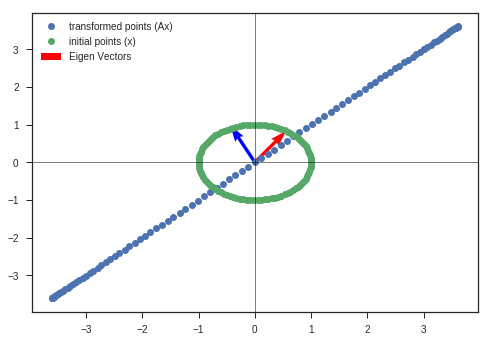

In [0]:
w_3, v_3, y_matrix_2 = eigen_decomposition(A, x_c, y_c)

Observation:
  * Determinant of the transformation matrix is 0. 
  * The space is completely contracted along one-dimension, causing it to lose all of its volume.

In [0]:
# What if determinant is < 0?
A_plus = np.array([[6,2],
                   [3,2]])

A_minus = np.array([[-6,-2],
                   [3,2]])

x = np.linspace(-1,1,10)
y = x**2

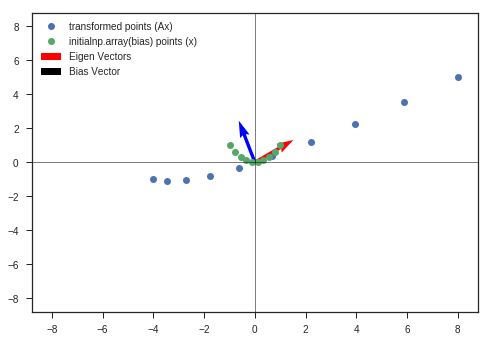

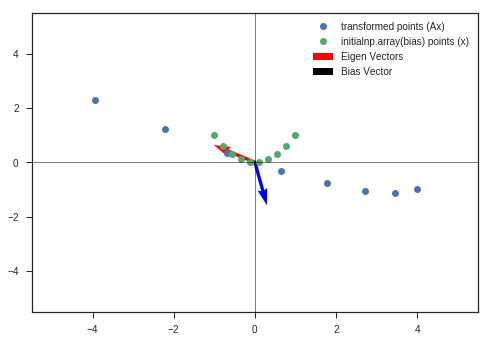

In [0]:
w_3, v_3, y_matrix_3 = eigen_decomposition(A_plus, x, y)
plt.show()
w_4, v_4, y_matrix_4 = eigen_decomposition(A_minus, x, y)

When Determinant is less than zero we get a reflection about y axis but the deformation is same (except the reflection)


## Enough of theory! Lets have an hands on seesion how to implement neural networks ! 

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 7')

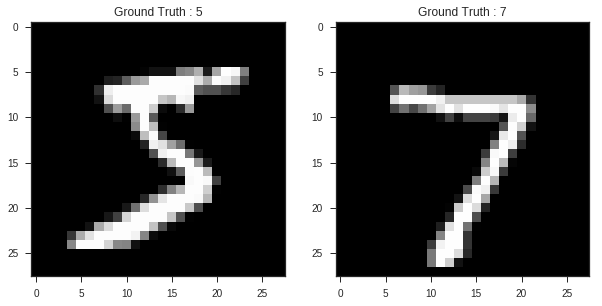

In [0]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [0]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [0]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

NameError: ignored

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 1.0680 - acc: 0.6747 - val_loss: 0.5387 - val_acc: 0.8440
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.4464 - acc: 0.8695 - val_loss: 0.3897 - val_acc: 0.8838
Epoch 3/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.3504 - acc: 0.8975 - val_loss: 0.3262 - val_acc: 0.9030
Epoch 4/20
13568/60000 [=====>........................] - ETA: 4s - loss: 0.3212 - acc: 0.9082

60000/60000 [==============================] - 6s 105us/step - loss: 0.3030 - acc: 0.9112 - val_loss: 0.2947 - val_acc: 0.9089
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2643 - acc: 0.9220 - val_loss: 0.2420 - val_acc: 0.9299
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2319 - acc: 0.9311 - val_loss: 0.2284 - val_acc: 0.9311
Epoch 7/20
30976/60000 [==============>...............] - ETA: 2s - loss: 0.2073 - acc: 0.9388

60000/60000 [==============================] - 6s 106us/step - loss: 0.2039 - acc: 0.9396 - val_loss: 0.2231 - val_acc: 0.9314
Epoch 8/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1785 - acc: 0.9468 - val_loss: 0.1728 - val_acc: 0.9491
Epoch 9/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1581 - acc: 0.9523 - val_loss: 0.1768 - val_acc: 0.9458
Epoch 10/20
38656/60000 [==================>...........] - ETA: 2s - loss: 0.1424 - acc: 0.9569

60000/60000 [==============================] - 6s 105us/step - loss: 0.1405 - acc: 0.9571 - val_loss: 0.1348 - val_acc: 0.9581
Epoch 11/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.1260 - acc: 0.9627 - val_loss: 0.1439 - val_acc: 0.9541
Epoch 12/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1137 - acc: 0.9662 - val_loss: 0.1407 - val_acc: 0.9564
Epoch 13/20
39936/60000 [==================>...........] - ETA: 1s - loss: 0.1070 - acc: 0.9685

60000/60000 [==============================] - 6s 104us/step - loss: 0.1032 - acc: 0.9695 - val_loss: 0.1162 - val_acc: 0.9646
Epoch 14/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0939 - acc: 0.9714 - val_loss: 0.1147 - val_acc: 0.9663
Epoch 15/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0854 - acc: 0.9745 - val_loss: 0.1040 - val_acc: 0.9677
Epoch 16/20
42752/60000 [====================>.........] - ETA: 1s - loss: 0.0793 - acc: 0.9767

60000/60000 [==============================] - 6s 104us/step - loss: 0.0782 - acc: 0.9762 - val_loss: 0.0975 - val_acc: 0.9711
Epoch 17/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0724 - acc: 0.9779 - val_loss: 0.0920 - val_acc: 0.9710
Epoch 18/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0663 - acc: 0.9799 - val_loss: 0.0840 - val_acc: 0.9751
Epoch 19/20
43008/60000 [====================>.........] - ETA: 1s - loss: 0.0605 - acc: 0.9813

60000/60000 [==============================] - 6s 105us/step - loss: 0.0619 - acc: 0.9810 - val_loss: 0.0831 - val_acc: 0.9757
Epoch 20/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0564 - acc: 0.9833 - val_loss: 0.0912 - val_acc: 0.9703


In [0]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 59us/step
Evaluation result on Test Data : Loss = 0.09124259161902591, accuracy = 0.9703


Text(0.5,1,'Accuracy Curves')

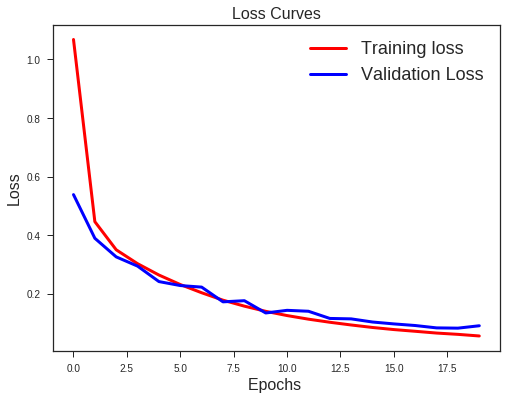

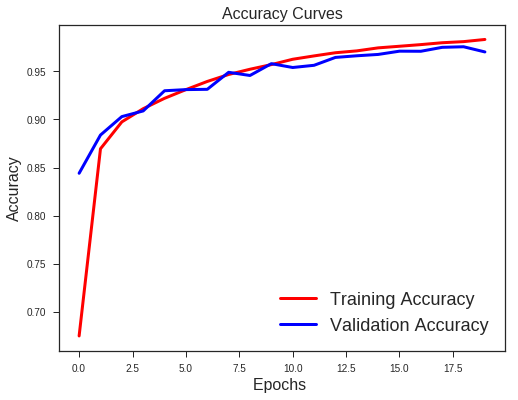

In [0]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## There is a clear sign of OverFitting. Why do you think so?

Carefully see the Validation loss and Training loss curve. Validation loss decreases and then it gradually increases. This means that model is memorising the dataset, though in this case accuracy is much higher. 

** How to combat that?? **
# Use Regularization !

In [0]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.3708 - acc: 0.8850 - val_loss: 0.1496 - val_acc: 0.9529
Epoch 2/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.1690 - acc: 0.9491 - val_loss: 0.0993 - val_acc: 0.9688
Epoch 3/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1310 - acc: 0.9607 - val_loss: 0.0904 - val_acc: 0.9727
Epoch 4/20
 1280/60000 [..............................] - ETA: 6s - loss: 0.1252 - acc: 0.9641

60000/60000 [==============================] - 7s 119us/step - loss: 0.1094 - acc: 0.9679 - val_loss: 0.0852 - val_acc: 0.9760
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0974 - acc: 0.9711 - val_loss: 0.0920 - val_acc: 0.9737
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0866 - acc: 0.9750 - val_loss: 0.0783 - val_acc: 0.9784
Epoch 7/20
21760/60000 [=========>....................] - ETA: 4s - loss: 0.0776 - acc: 0.9775

60000/60000 [==============================] - 7s 118us/step - loss: 0.0803 - acc: 0.9766 - val_loss: 0.0714 - val_acc: 0.9803
Epoch 8/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0789 - acc: 0.9768 - val_loss: 0.0688 - val_acc: 0.9811
Epoch 9/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0715 - acc: 0.9785 - val_loss: 0.0784 - val_acc: 0.9795
Epoch 10/20
25344/60000 [===========>..................] - ETA: 3s - loss: 0.0629 - acc: 0.9816

60000/60000 [==============================] - 7s 117us/step - loss: 0.0674 - acc: 0.9803 - val_loss: 0.0740 - val_acc: 0.9794
Epoch 11/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0648 - acc: 0.9806 - val_loss: 0.0776 - val_acc: 0.9806
Epoch 12/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0633 - acc: 0.9818 - val_loss: 0.0749 - val_acc: 0.9814
Epoch 13/20
25344/60000 [===========>..................] - ETA: 3s - loss: 0.0593 - acc: 0.9828

60000/60000 [==============================] - 7s 119us/step - loss: 0.0603 - acc: 0.9828 - val_loss: 0.0735 - val_acc: 0.9835
Epoch 14/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0579 - acc: 0.9829 - val_loss: 0.0770 - val_acc: 0.9824
Epoch 15/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0557 - acc: 0.9835 - val_loss: 0.0843 - val_acc: 0.9817
Epoch 16/20
25344/60000 [===========>..................] - ETA: 3s - loss: 0.0526 - acc: 0.9846

60000/60000 [==============================] - 7s 117us/step - loss: 0.0544 - acc: 0.9843 - val_loss: 0.0769 - val_acc: 0.9819
Epoch 17/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0546 - acc: 0.9849 - val_loss: 0.0762 - val_acc: 0.9825
Epoch 18/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0522 - acc: 0.9856 - val_loss: 0.0772 - val_acc: 0.9844
Epoch 19/20
25344/60000 [===========>..................] - ETA: 3s - loss: 0.0485 - acc: 0.9863

60000/60000 [==============================] - 7s 117us/step - loss: 0.0490 - acc: 0.9858 - val_loss: 0.0758 - val_acc: 0.9826
Epoch 20/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0488 - acc: 0.9860 - val_loss: 0.0773 - val_acc: 0.9846


Text(0.5,1,'Accuracy Curves')

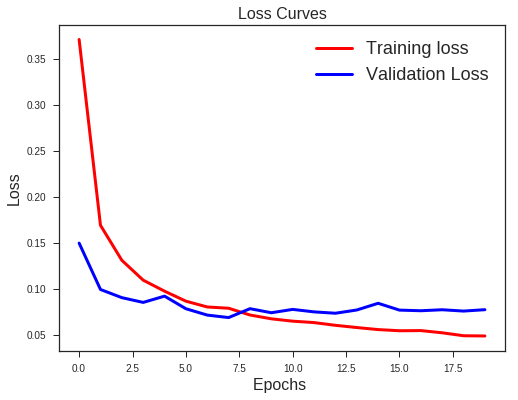

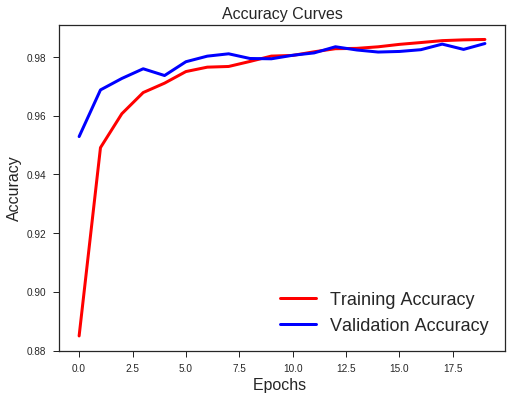

In [0]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

## What we note??

* Validation loss is not increasing as it did before.
* Difference between the validation and training accuracy is not that much

This implies better generalisation and can work will on unseen data samples.


## Time to train your own neural network !!!

In [1]:
!pip install matplotlib

from keras.datasets import cifar10
import numpy as np
(train_images, train_labels), (test_images, test_labels)  = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 15s 0us/step


In [2]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[5,2])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


NameError: ignored

In [0]:

# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [0]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()

model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(720, activation='relu', input_shape=(dimData,)))
model.add(Dense(720, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 50s 1ms/step - loss: 2.3366 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 49s 985us/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/20
 9472/50000 [====>.........................] - ETA: 37s - loss: 2.3026 - acc: 0.0984

50000/50000 [==============================] - 49s 985us/step - loss: 2.3027 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 49s 988us/step - loss: 2.3027 - acc: 0.0962 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/20
29952/50000 [================>.............] - ETA: 18s - loss: 2.3026 - acc: 0.0980

50000/50000 [==============================] - 50s 991us/step - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 49s 989us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/20
34560/50000 [===================>..........] - ETA: 14s - loss: 2.3027 - acc: 0.0953

50000/50000 [==============================] - 49s 986us/step - loss: 2.3027 - acc: 0.0953 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/20
50000/50000 [==============================] - 49s 985us/step - loss: 2.3027 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 9/20
35584/50000 [====================>.........] - ETA: 13s - loss: 2.3027 - acc: 0.0980

50000/50000 [==============================] - 49s 985us/step - loss: 2.3027 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 10/20
50000/50000 [==============================] - 49s 986us/step - loss: 2.3027 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 11/20
35584/50000 [====================>.........] - ETA: 13s - loss: 2.3027 - acc: 0.0969

50000/50000 [==============================] - 49s 985us/step - loss: 2.3027 - acc: 0.0964 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 12/20
50000/50000 [==============================] - 49s 987us/step - loss: 2.3027 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 13/20
35584/50000 [====================>.........] - ETA: 13s - loss: 2.3026 - acc: 0.0983

50000/50000 [==============================] - 49s 989us/step - loss: 2.3027 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 14/20
25088/50000 [==============>...............] - ETA: 23s - loss: 2.3026 - acc: 0.1005

KeyboardInterrupt: ignored

In [0]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 2s 250us/step
Evaluation result on Test Data : Loss = 1.4804802495956422, accuracy = 0.4701


## Try to maximize the test accuracy !!! Take it as a challenge. (Tuning the parameters is basically an ART :p)